# Imbalanced-learn for

In [1]:
from sklearn.metrics import classification_report,confusion_matrix,log_loss,auc,plot_confusion_matrix
from sklearn.preprocessing import (
    MinMaxScaler, label_binarize, OneHotEncoder, LabelEncoder)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV,train_test_split
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from itertools import cycle, product
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle
import seaborn as sns
import warnings
import random
from tqdm import tqdm_notebook
warnings.filterwarnings('ignore')
%matplotlib inline

## Raw Data

In [2]:
dataset=pd.read_excel('../Case.xlsx',sheet_name='initial')
data=dataset.values

X =data[:,1:18]
Y =data[:,19]
seed = random.randint(0,1000)
X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)

train_set_dict = {}
train_set_dict['RawData'] = (X_train,y_train)

label_dict = {'Normal': 0,
              'SCW': 1}
labels = [key for i in sorted(label_dict.values()) for key,val in label_dict.items() if val==i]
labels_number = sorted(label_dict.values()) # [0, 1]

## Over-sampling

### RandomOverSample

In [3]:
# 简单的复制样本
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled ,y_resampled= ros.fit_resample(X_train,y_train)
from collections import Counter
print(sorted(Counter(y_resampled).items()))
train_set_dict['RandomOverSampler'] = (X_resampled ,y_resampled)

[(0.0, 1800), (1.0, 1800)]


### SMOTE

In [4]:
from imblearn.over_sampling import SMOTE, ADASYN
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))
train_set_dict['SMOTE'] = (X_resampled ,y_resampled)

[(0.0, 1800), (1.0, 1800)]


### ADASYN

In [5]:
from imblearn.over_sampling import SMOTE, ADASYN
X_resampled, y_resampled = ADASYN().fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))
train_set_dict['ADASYN'] = (X_resampled ,y_resampled)

[(0.0, 1800), (1.0, 1833)]


### BorderlineSMOTE

In [6]:
from imblearn.over_sampling import BorderlineSMOTE
X_resampled, y_resampled = BorderlineSMOTE(kind='borderline-1').fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))
train_set_dict['BorderlineSMOTE-1'] = (X_resampled ,y_resampled)

[(0.0, 1800), (1.0, 1800)]


In [7]:
from imblearn.over_sampling import BorderlineSMOTE
X_resampled, y_resampled = BorderlineSMOTE(kind='borderline-2').fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))
train_set_dict['BorderlineSMOTE-2'] = (X_resampled ,y_resampled)

[(0.0, 1800), (1.0, 1799)]


## Under-sampling

### ClusterCentroids

In [8]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=0)
X_resampled, y_resampled = cc.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))
train_set_dict['ClusterCentroids'] = (X_resampled ,y_resampled)

[(0.0, 152), (1.0, 152)]


### RandomUnderSampler

In [9]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))
train_set_dict['RandomUnderSampler'] = (X_resampled ,y_resampled)

[(0.0, 152), (1.0, 152)]


### NearMiss

In [10]:
from imblearn.under_sampling import NearMiss
nm1 = NearMiss(version=1)
X_resampled_nm1, y_resampled = nm1.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))
train_set_dict['NearMiss-1'] = (X_resampled ,y_resampled)

[(0.0, 152), (1.0, 152)]


In [11]:
from imblearn.under_sampling import NearMiss
nm1 = NearMiss(version=2)
X_resampled_nm1, y_resampled = nm1.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))
train_set_dict['NearMiss-2'] = (X_resampled ,y_resampled)

[(0.0, 152), (1.0, 152)]


### EditedNearestNeighbours

In [12]:
from imblearn.under_sampling import EditedNearestNeighbours
enn = EditedNearestNeighbours()
X_resampled, y_resampled = enn.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))
train_set_dict['EditedNearestNeighbours'] = (X_resampled ,y_resampled)

[(0.0, 1396), (1.0, 152)]


### RepeatedEditedNearestNeighbours

In [13]:
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
renn = RepeatedEditedNearestNeighbours()
X_resampled, y_resampled = renn.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))
train_set_dict['RepeatedEditedNearestNeighbours'] = (X_resampled ,y_resampled)

[(0.0, 1161), (1.0, 152)]


### AllKNN

In [14]:
from imblearn.under_sampling import AllKNN
allknn = AllKNN()
X_resampled, y_resampled = allknn.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))
train_set_dict['AllKNN'] = (X_resampled ,y_resampled)

[(0.0, 1316), (1.0, 152)]


### CondensedNearestNeighbour

In [15]:
from imblearn.under_sampling import CondensedNearestNeighbour
cnn = CondensedNearestNeighbour(random_state=0)
X_resampled, y_resampled = cnn.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))
train_set_dict['CondensedNearestNeighbour'] = (X_resampled ,y_resampled)
#slow

[(0.0, 381), (1.0, 152)]


### OneSidedSelection

In [16]:
from imblearn.under_sampling import OneSidedSelection
oss = OneSidedSelection(random_state=0)
X_resampled, y_resampled = oss.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))
train_set_dict['OneSidedSelection'] = (X_resampled ,y_resampled)

[(0.0, 1538), (1.0, 152)]


### NeighbourhoodCleaningRule

In [17]:
from imblearn.under_sampling import NeighbourhoodCleaningRule
ncr = NeighbourhoodCleaningRule()
X_resampled, y_resampled = ncr.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))
train_set_dict['NeighbourhoodCleaningRule'] = (X_resampled ,y_resampled)

[(0.0, 1451), (1.0, 152)]


### InstanceHardnessThreshold

In [18]:
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import InstanceHardnessThreshold
iht = InstanceHardnessThreshold(random_state=0,
                                estimator=LogisticRegression(
                                    solver='lbfgs', multi_class='auto'))
X_resampled, y_resampled = iht.fit_resample(X_train, y_train.astype('int64'))
print(sorted(Counter(y_resampled).items()))
train_set_dict['InstanceHardnessThreshold'] = (X_resampled ,y_resampled)

[(0, 152), (1, 152)]


## Over- and under-sampling

### SMOTEENN

In [19]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))
train_set_dict['SMOTEENN'] = (X_resampled ,y_resampled)

[(0.0, 1091), (1.0, 1647)]


### SMOTETomek

In [20]:
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=0)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))
train_set_dict['SMOTETomek'] = (X_resampled ,y_resampled)

[(0.0, 1773), (1.0, 1773)]


## Bagging

使用训练数据的不同随机子集来训练每个 Base Model，最后每个 Base Model 权重相同，分类问题进行投票，回归问题平均。

随机森林就用到了Bagging，并且具有天然的并行性。

### Bagging

In [21]:
print(sorted(Counter(y_train).items()))
train_set_dict['Bagging'] = (X_train ,y_train)

[(0.0, 1800), (1.0, 152)]


### BalancedBagging

In [22]:
print(sorted(Counter(y_train).items()))
train_set_dict['BalancedBagging'] = (X_train ,y_train)

[(0.0, 1800), (1.0, 152)]


### BalancedRandomForest

In [23]:
print(sorted(Counter(y_train).items()))
train_set_dict['BalancedRandomForest'] = (X_train ,y_train)

[(0.0, 1800), (1.0, 152)]


## Boosting

Boosting是一种迭代的方法，每一次训练会更关心上一次被分错的样本，比如改变被错分的样本的权重的Adaboost方法。还有许多都是基于这种思想，比如Gradient Boosting等。

### RUSBoost

In [24]:
print(sorted(Counter(y_train).items()))
train_set_dict['RUSBoost'] = (X_train ,y_train)

[(0.0, 1800), (1.0, 152)]


### EasyEnsemble

In [25]:
print(sorted(Counter(y_train).items()))
train_set_dict['EasyEnsemble'] = (X_train ,y_train)

[(0.0, 1800), (1.0, 152)]


## 评估

  0%|          | 0/24 [00:00<?, ?it/s]

0.764
0.763
0.790
0.791
0.803
0.777
0.664
0.784
0.784
0.784
0.762
0.771
0.766
0.749
0.752
0.767
0.769
0.789
0.800
0.664
0.768
0.777
0.724
0.747


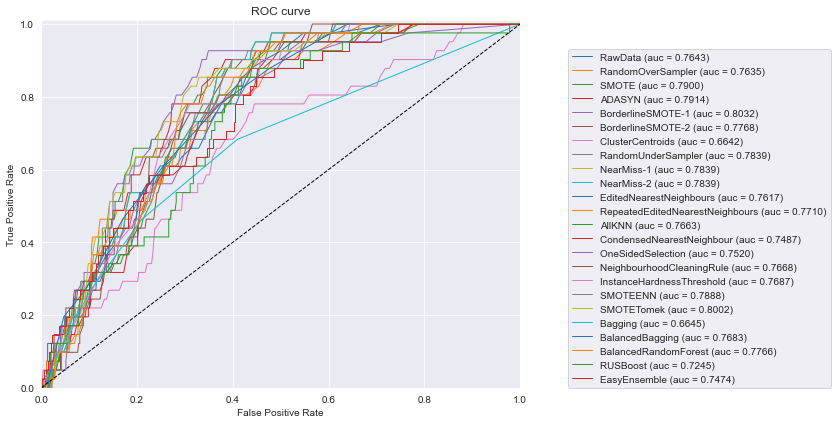

In [26]:
from sklearn.svm import LinearSVC
from imblearn.metrics import classification_report_imbalanced
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
################### train #####################################
plt.figure(figsize=(12, 6))
cm = []
clf_report_list = []
for name, (X, y) in tqdm_notebook(list(train_set_dict.items())):
    RANDOM_STATE = 2019
    if name in ['Bagging']:
        from sklearn.ensemble import BaggingClassifier
        from sklearn.tree import DecisionTreeClassifier
        clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                random_state=0)
    elif name in ['BalancedBagging']:
        from imblearn.ensemble import BalancedBaggingClassifier
        clf = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                        sampling_strategy='auto',
                                        replacement=False,
                                        random_state=0)
    elif name in ['BalancedRandomForest']:
        from imblearn.ensemble import BalancedRandomForestClassifier
        clf = BalancedRandomForestClassifier(n_estimators=100, random_state=0)
    elif name in ['RUSBoost']:
        from imblearn.ensemble import RUSBoostClassifier
        clf = RUSBoostClassifier(random_state=0)
    elif name in ['EasyEnsemble']:
        from imblearn.ensemble import EasyEnsembleClassifier
        clf = EasyEnsembleClassifier(random_state=0)
    else:
        # 模型
        clf = RandomForestClassifier(n_estimators=161,
                                     max_depth=49,
                                     max_features="sqrt",
                                     random_state=RANDOM_STATE)
    clf.fit(X, y)
    y_test_pred = clf.predict(X_test)
    y_test_score = clf.predict_proba(X_test)  # valid score
######################### 测试集评估 ########################

    # 分类报告
    clf_report = classification_report_imbalanced(
        y_test, y_test_pred, digits=4, target_names=labels)
    clf_report_list.append(clf_report)
    # 混淆矩阵
    cnf_matrix = confusion_matrix(y_test, y_test_pred)
    cm.append((name, cnf_matrix))
    # ROC
    roc_auc = roc_auc_score(
        y_test, y_test_score[:,1])
    print('{:.3f}'.format(roc_auc))

    sns.set_style('darkgrid')
#     plt.figure(figsize=(5,4))

    fpr, tpr, thresholds = roc_curve(y_test, y_test_score[:,1])
    plt.plot(fpr, tpr, lw=1,
             label='{0} (auc = {1:0.4f})'.format(name, roc_auc))
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc=(1.1, 0))
plt.tight_layout()
plt.show()

In [27]:
#for clf_report,name in zip(clf_report_list,train_set_dict.keys()):
#    print(name,'\n',clf_report)

In [28]:
for name,c in cm:
    print("{:}: {:.3f}".format(name, c[1][1]/(c[1][1]+c[0][1]+c[1][0])))

0.000
0.062
0.157
0.135
0.157
0.129
0.131
0.161
0.161
0.161
0.038
0.118
0.053
0.099
0.000
0.075
0.116
0.184
0.185
0.023
0.162
0.173
0.113
0.138
